# $\color{orange}{\textbf{Introdução}}$

$\color{gray}{\textbf{Um dos motivos principais para a existência de vida na Terra é a gama de condições favoráveis}}$
$\color{gray}{\textbf{que o Sol propicia ao nosso planketa. Sendo assim, nota-se que encontrar estrelas do tipo Sol é de}}$
$\color{gray}{\textbf{extrema importância para a procura de vida fora da Terra.}}$

# $\color{orange}{\textbf{Objetivos}}$

$\color{gray}{\textbf{Esse é um projeto inicial que pretende destinguir estrelas frias do tipo solar de gigantes vermelhas}}$
$\color{gray}{\textbf{usando Machine Learning.}}$

# $\color{orange}{\textbf{Importação das bibliotecas}}$

In [86]:
import numpy as np # Importando o numpy para trabalhar com matrizes e etc.
import pandas as pd # Importação do pandas para trabalhar com dados.
from pandas_profiling import ProfileReport # Importando o ProfileReport para fazer uma análise geral do dataset
"""
Importações para trabalhar com gráficos
"""
import seaborn as sbn
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator 
from matplotlib.font_manager import FontProperties
"""
Importações para Machine Learning
"""
"""
train_test_split: Realiza um split nos dados entre treino e teste.
GridSearchCV: Trabalha com ajuste de hiperparâmetros para os algoritmos de ML.
"""
from sklearn.model_selection import train_test_split, GridSearchCV
"""
Ignorar alguns warnings que não afetam o código
"""
import warnings
warnings.filterwarnings("ignore")
"""
Importação das métricas de avaliação de um modelo;
"""
from sklearn.metrics import (classification_report, # Report geral
                             accuracy_score, # Acurácia
                             roc_auc_score,
                             roc_curve, # Curva roc
                             confusion_matrix) # Matriz de confusão
"""
MinMaxScaler: Realiza a normalização dos dados
"""
from sklearn.preprocessing import MinMaxScaler
"""
Regressão logística
"""
from sklearn.linear_model import LogisticRegression
"""
Algoritmo dos K vizinhos mais próximos
"""
from sklearn.neighbors import KNeighborsClassifier
"""
Importando do Naive Bayes o algoritmo GaussianNB
"""
from sklearn.naive_bayes import GaussianNB
"""
Algoritmos de aprendizado não supervisionado: KMeans
"""
from sklearn.cluster import KMeans
"""
Importação dos algoritmos ensemble
"""
from sklearn.ensemble import (RandomForestClassifier, 
                             ExtraTreesClassifier, 
                             AdaBoostClassifier, 
                             GradientBoostingClassifier)
"""
SVC: Support vector machine
"""
from sklearn.svm import SVC
"""
Parte das importações para a rede neural
"""
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

# $\color{orange}{\textbf{Chamando os dados}}$

In [87]:
"""
Chamando o dataset só com gigantes vermelhas
"""
Gigantes_vermelhas = pd.read_csv("2_parte_RGB_HeB.txt", sep = "|", header = None)
Gigantes_vermelhas.columns = ["KIC", "Teff", "e_Teff", "logg", "e_logg", "[Fe/H]", 
                  "e_[Fe/H]", "NoCorM", "e_NoCorM", "NoCorR", "e_NoCorR",
                  "RGBcorM", "e_RGBcorM", "RGBcorR", "e_RGBcorR", "ClcorM", 
                  "e_ClcorM", "ClcorR", "e_ClcorR", "Phase"]
"""
Mostra na tela a parte superior do DF "Gigantes_vermelhas"
"""
pd.set_option("display.max_columns", len(Gigantes_vermelhas.columns))
Gigantes_vermelhas.head(14)

,KIC,Teff,e_Teff,logg,e_logg,[Fe/H],e_[Fe/H],NoCorM,e_NoCorM,NoCorR,e_NoCorR,RGBcorM,e_RGBcorM,RGBcorR,e_RGBcorR,ClcorM,e_ClcorM,ClcorR,e_ClcorR,Phase
0,757137,4751,139,2.383,0.012,-0.08,0.30,1.70,0.14,13.91,0.41,1.55,0.13,13.26,0.39,1.72,0.14,13.97,0.41,1
1,892010,4834,151,2.161,0.023,0.21,0.30,1.42,0.29,16.37,1.38,1.36,0.28,16.02,1.34,1.43,0.30,16.47,1.39,0
2,892738,4534,135,1.769,0.022,-0.25,0.30,1.15,0.21,23.15,1.62,0.99,0.18,21.49,1.48,1.12,0.20,22.86,1.60,0
3,892760,5188,183,2.394,0.011,-0.21,0.30,1.00,0.14,10.51,0.68,1.04,0.15,10.74,0.70,1.00,0.14,10.52,0.68,2
4,893214,4728,80,2.522,0.008,-0.15,0.15,1.72,0.10,11.90,0.26,1.54,0.09,11.29,0.24,1.72,0.10,11.92,0.26,1
5,893233,4207,147,1.668,0.012,0.22,0.30,0.86,0.09,22.43,0.95,0.71,0.07,20.46,0.84,0.84,0.09,22.28,0.94,0
6,1026084,5072,166,2.534,0.013,-0.12,0.30,1.71,0.18,11.69,0.48,1.67,0.17,11.55,0.48,1.75,0.18,11.83,0.49,2
7,1026180,4718,148,2.471,0.012,-0.02,0.30,1.65,0.17,12.37,0.53,1.50,0.16,11.80,0.50,1.67,0.17,12.43,0.53,2
8,1026309,4514,80,2.121,0.020,0.25,0.15,2.71,0.42,23.71,1.35,2.60,0.40,23.22,1.32,2.73,0.42,23.78,1.35,0
9,1026326,5123,162,2.899,0.009,-0.41,0.30,1.32,0.08,6.77,0.15,1.30,0.08,6.70,0.15,1.36,0.09,6.85,0.16,1


In [88]:
"""
Chamando o dataset só com estrelas frias do tipo Sol
"""
Estrelas_do_tipo_Sol = pd.read_csv("age_prediction.txt", sep = "|", header = None)
Estrelas_do_tipo_Sol.columns = ["Star", "Teff", "e_Teff", "logg",
               "e_logg", "Vt", "e_Vt", "[Fe/H]", "e_[Fe/H]",
               "Mass", "e_Mass", "Age", "e_Age"]
"""
Mostra na tela a parte superior do DF "Estrelas_do_tipo_Sol"
"""
pd.set_option("display.max_columns", len(Estrelas_do_tipo_Sol.columns))
Estrelas_do_tipo_Sol.head(14)

,Star,Teff,e_Teff,logg,e_logg,Vt,e_Vt,[Fe/H],e_[Fe/H],Mass,e_Mass,Age,e_Age
0,HD 55,4554,88,4.54,0.21,0.06,1.63,-0.67,0.01,,,4.531,3.824
1,HD 142,6431,123,4.82,0.11,2.10,0.28,0.05,0.08,1.230,0.033,1.120,0.904
2,HD 283,5135,24,4.49,0.07,0.47,0.06,-0.55,0.01,0.717,0.015,5.167,4.107
3,HD 361,5888,14,4.54,0.08,1.03,0.03,-0.13,0.01,1.029,0.011,0.356,0.283
4,HD 750,5069,32,4.33,0.10,0.66,0.07,-0.30,0.02,0.752,0.017,4.825,4.118
5,HD 870,5360,24,4.40,0.08,0.79,0.04,-0.12,0.02,0.859,0.016,1.594,1.591
6,HD 967,5595,18,4.59,0.02,0.90,0.05,-0.66,0.01,0.764,0.018,7.775,3.945
7,HD 1237,5489,40,4.46,0.11,1.04,0.06,0.06,0.03,0.924,0.019,1.765,1.696
8,HD 1320,5699,13,4.55,0.05,0.89,0.02,-0.26,0.01,0.912,0.021,2.388,2.005
9,HD 1388,5970,15,4.42,0.05,1.13,0.02,0.00,0.01,1.061,0.013,3.005,0.802


# $\color{orange}{\textbf{Pré-processamento de dados}}$

$\color{gray}{\textbf{A nossa classificação vai ser com base em três variáveis preditoras principais: Teff / log(g) / [Fe/H]}}$

In [89]:
Gigantes_vermelhas.drop(["KIC", "NoCorM", "e_NoCorM", "NoCorR", "e_NoCorR",
                  "RGBcorM", "e_RGBcorM", "RGBcorR", "e_RGBcorR", "ClcorM", 
                  "e_ClcorM", "ClcorR", "e_ClcorR", "Phase", "e_Teff", "e_logg", "e_[Fe/H]"], axis = 1, inplace = True)
Estrelas_do_tipo_Sol.drop(["Star", "Vt", "e_Vt",
                          "Mass", "e_Mass", "Age", "e_Age", "e_Teff", "e_logg", "e_[Fe/H]"], axis = 1, inplace = True)

$\color{gray}{\textbf{Agora, vamos embaralhar as linhas dos dois Dataframes...}}$

In [90]:
Gigantes_vermelhas_ = Gigantes_vermelhas.sample(frac=1).reset_index(drop = True)
Estrelas_do_tipo_Sol_ = Estrelas_do_tipo_Sol.sample(frac=1).reset_index(drop = True)
Gigantes_vermelhas = pd.DataFrame(Gigantes_vermelhas_, columns = Gigantes_vermelhas.columns)
Estrelas_do_tipo_Sol = pd.DataFrame(Estrelas_do_tipo_Sol_, columns = Estrelas_do_tipo_Sol.columns)

$\color{gray}{\textbf{Note que há uma disparidade muito grande entre o número de linhas dos dois Dataframes;}}$

In [91]:
print(f"Shape_Gigantes_vermelhas = {Gigantes_vermelhas.shape}")
print(f"Shape_Estrelas_do_tipo_Sol = {Estrelas_do_tipo_Sol.shape}")

Shape_Gigantes_vermelhas = (16094, 3)
Shape_Estrelas_do_tipo_Sol = (451, 3)


$\color{gray}{\textbf{Vamos pegar apenas 451 linhas do Dataframe das gigantes vermelhas}}$

In [92]:
Gigantes_vermelhas = Gigantes_vermelhas.loc[0:450]

In [93]:
print(f"Shape_Gigantes_vermelhas = {Gigantes_vermelhas.shape}")
print(f"Shape_Estrelas_do_tipo_Sol = {Estrelas_do_tipo_Sol.shape}")

Shape_Gigantes_vermelhas = (451, 3)
Shape_Estrelas_do_tipo_Sol = (451, 3)


$\color{gray}{\textbf{Pronto, agora vamos adicionar a variável target aos Dataframes.}}$

$\color{gray}{\textbf{Gigante vermelha = 0}}$

$\color{gray}{\textbf{Estrela do tipo Sol = 1}}$

In [94]:
target = []
for i in range(0, 451):
    target.append(0)
target = pd.DataFrame(target, columns = ["target"])
Gigantes_vermelhas = pd.concat([Gigantes_vermelhas, target], axis = 1)
Gigantes_vermelhas.head()

,Teff,logg,[Fe/H],target
0,4205,1.594,-0.14,0
1,5447,2.420,-0.77,0
2,4820,2.621,-0.10,0
3,4403,2.058,-0.34,0
4,4945,2.103,-0.54,0


In [95]:
target = []
for i in range(0, 451):
    target.append(1)
target = pd.DataFrame(target, columns = ["target"])
Estrelas_do_tipo_Sol = pd.concat([Estrelas_do_tipo_Sol, target], axis = 1)
Estrelas_do_tipo_Sol.head()

,Teff,logg,[Fe/H],target
0,4770,4.31,-0.01,1
1,5431,4.39,-0.04,1
2,5561,4.31,-0.11,1
3,5520,4.32,0.18,1
4,4418,4.23,-0.30,1


$\color{gray}{\textbf{Hora de concatenar os dois Dataframes...}}$

In [96]:
Concatenado_GV_SSOL = pd.concat([Gigantes_vermelhas, Estrelas_do_tipo_Sol], axis = 0)
Concatenado_GV_SSOL = Concatenado_GV_SSOL.sample(frac = 1).reset_index(drop = True)
Concatenado_GV_SSOL = pd.DataFrame(Concatenado_GV_SSOL, columns = Estrelas_do_tipo_Sol.columns)
Concatenado_GV_SSOL.head(30)

,Teff,logg,[Fe/H],target
0,4966,2.354,-0.12,0
1,4779,2.596,0.05,0
2,4723,2.364,-0.20,0
3,5428,4.370,-0.18,1
4,4746,2.397,0.11,0
5,4978,2.420,-0.12,0
6,4849,3.113,0.09,0
7,5397,4.270,0.15,1
8,4408,2.987,0.45,0
9,4978,4.330,-0.13,1


# $\color{orange}{\textbf{Dtypes}}$

In [97]:
Concatenado_GV_SSOL.dtypes

Teff        int64
logg      float64
[Fe/H]    float64
target      int64
dtype: object

# $\color{orange}{\textbf{Análise dos dados}}$

In [98]:
ProfileReport(Concatenado_GV_SSOL)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

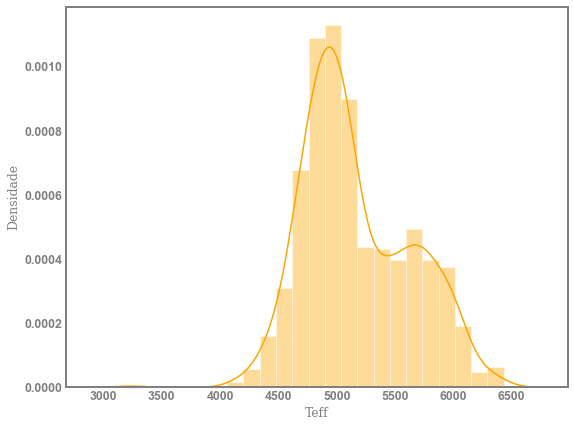

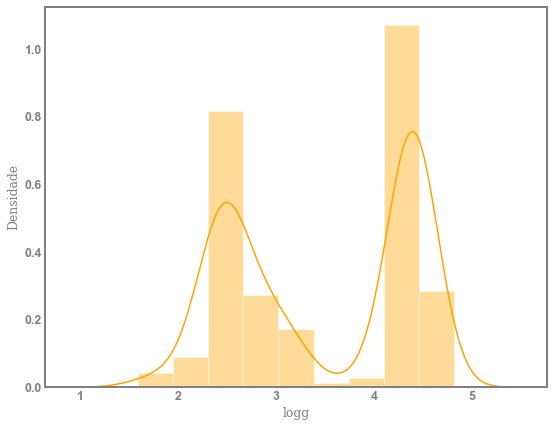

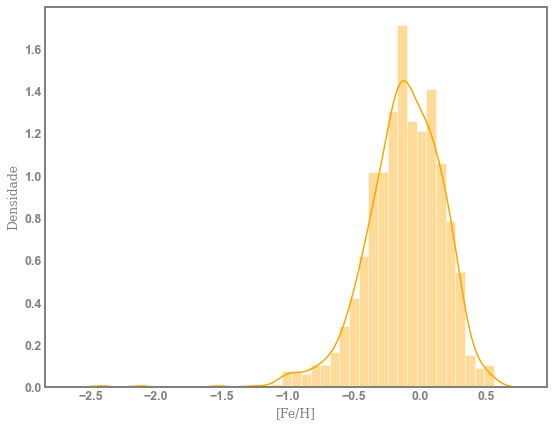

In [99]:
"""
Criação da primeira fonte de texto
"""
Font1 = {"family":"serif", # Family da fonte
         "weight":"normal", # Peso da fonte
         "color": "gray", # cor da fornte
         "size": 12.4} # size da fonte
"""
Plotando histogramas para cada variável característica
"""
for i in Concatenado_GV_SSOL.drop(["target"], axis = 1).columns:
    """
    Alocando a figura
    """
    fig, ax = plt.subplots(figsize = (9, 7))
    """
    Plot do gráfico
    """
    sbn.distplot(Concatenado_GV_SSOL.drop(["target"], axis = 1)[i], color = "orange")
    plt.grid(False)
    """
    Redefinição da grossura dos eixos e da cor dos mesmos
    """
    for axis in ["left", "right", "top", "bottom"]:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color("gray")
    """
    Trabalha com os ticks do gráfico
    """     
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 12.4)
    ax.tick_params(which = "minor", direction = "in", width = 2, color = "gray")
    ax.tick_params(which = "major", direction = "in", color = "gray", length=3.4, width = 2)
    """
    Labels
    """
    ax.set_ylabel("Densidade", fontdict = Font1)
    ax.set_xlabel(f"{i}", fontdict = Font1)
    """
    Tudo em negrito
    """
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    """
    Fundo branco
    """
    fig.patch.set_facecolor("white")
    Cor_fundo = plt.gca()
    Cor_fundo.set_facecolor("white")
    Cor_fundo.patch.set_alpha(1)
    fig.patch.set_facecolor("white")
    """
    Mostrar gráfico
    """
    plt.show()

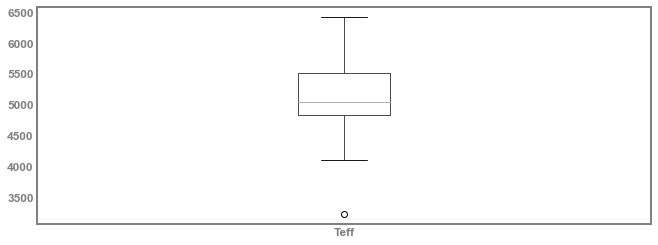

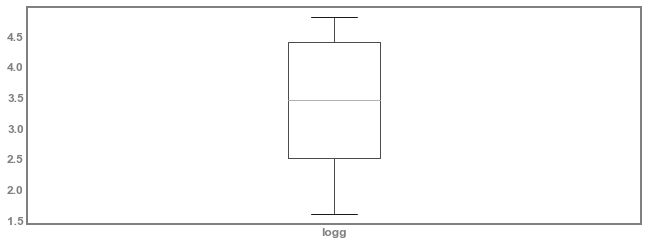

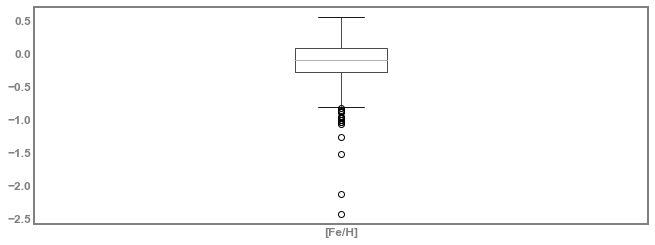

In [100]:
"""
Plot dos histogramas para cada variável
"""
for i in Concatenado_GV_SSOL.drop(["target"], axis = 1).columns:
    """
    Alocando a figura
    """
    fig, ax = plt.subplots(figsize=(11,4))
    """
    Plot do gráfico
    """
    Concatenado_GV_SSOL.drop(["target"], axis = 1).boxplot(column = i, grid = False, fontsize=12)
    fig.patch.set_facecolor("white")
    for axis in ["left", "right", "top", "bottom"]:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color("gray")
    ax.xaxis.set_minor_locator(AutoMinorLocator())    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 12, bottom = False)
    ax.tick_params(which = "minor", direction = "in", width = 2, color = "gray", bottom = False)
    ax.tick_params(which = "major", direction = "in", color = "gray", length=3.4, width = 2, bottom = False)
    """
    Tudo em negrito
    """
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    """
    Fundo branco
    """
    fig.patch.set_facecolor("white")
    Cor_fundo = plt.gca()
    Cor_fundo.set_facecolor("white")
    Cor_fundo.patch.set_alpha(1)
    fig.patch.set_facecolor("white")
    plt.show()

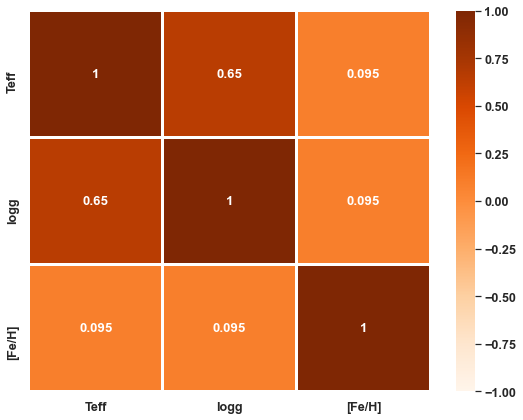

In [101]:
ax, fig = plt.subplots(figsize = (9, 7))
"""
Matriz de correlação entre as variáveis mostrada na forma de um mapa de calor
"""
sbn.heatmap(Concatenado_GV_SSOL.drop(["target"], axis = 1).corr(), # Matriz de correlação
            annot = True, # Anotar p = True
            vmin = -1, # p min
            vmax = 1, # p max
            cmap = "Oranges", # Colormap
            linewidths = 2, # width da linha de controno entre as células do mapa de calor
            linecolor = "white", # cor de tais linhas
            annot_kws = {"size": 13.2}) # size dos números no heatmap
"""
Mudando o size da fonte dos labels
"""
sbn.set(font_scale=1.15)
"""
Tudo em negrito
"""
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
"""

"""
fig.patch.set_facecolor("white")
"""
Mostrar gráfico
"""
plt.show()

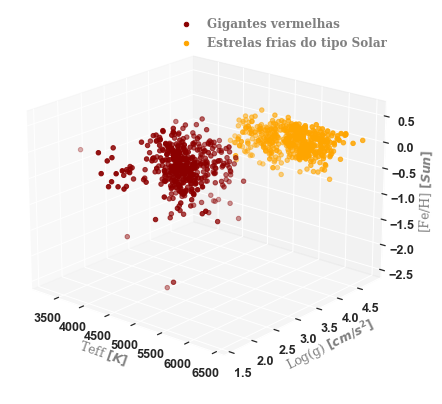

In [102]:
"""
Criação da 2º fonte
"""
Font2 = FontProperties(family = "serif",
                      weight = "bold",
                      style = "normal",
                      size = 12)
fig = plt.figure(figsize = (7, 10)) # Alocar a figura
ax = fig.add_subplot(projection = "3d") # plot 3d
ax.scatter(Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 0]["Teff"], 
           Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 0]["logg"],
           Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 0]["[Fe/H]"], c = "darkred", label = "Gigantes vermelhas")
ax.scatter(Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 1]["Teff"], 
           Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 1]["logg"],
           Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 1]["[Fe/H]"], c = "orange", label = "Estrelas frias do tipo Solar")
ax.view_init(20, -50) # Ângulo de visão
"""
Labels
"""
ax.set_xlabel("Teff $[K]$", fontdict = Font1)
ax.set_ylabel("Log(g) $[cm/s^{2}]$", fontdict = Font1)
ax.set_zlabel("[Fe/H] $[Sun]$", fontdict = Font1)
"""
Fundo branco
"""
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
"""
Legenda
"""
plt.legend(frameon = False, prop = Font2, labelcolor = "gray")
"""
Mostrar o gráfico
"""
plt.show()

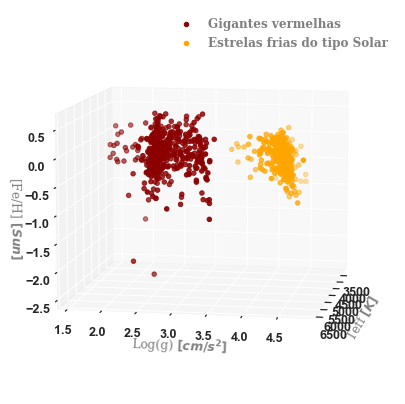

In [103]:
Font2 = FontProperties(family = "serif",
                      weight = "bold",
                      style = "normal",
                      size = 12)
fig = plt.figure(figsize = (7, 10))
ax = fig.add_subplot(projection = "3d")
ax.scatter(Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 0]["Teff"], 
           Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 0]["logg"],
           Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 0]["[Fe/H]"], c = "darkred", label = "Gigantes vermelhas")
ax.scatter(Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 1]["Teff"], 
           Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 1]["logg"],
           Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 1]["[Fe/H]"], c = "orange", label = "Estrelas frias do tipo Solar")
ax.view_init(9, 10)
ax.set_xlabel("Teff $[K]$", fontdict = Font1)
ax.set_ylabel("Log(g) $[cm/s^{2}]$", fontdict = Font1)
ax.set_zlabel("[Fe/H] $[Sun]$", fontdict = Font1)
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.legend(frameon = False, prop = Font2, labelcolor = "gray")
plt.show()

$\color{gray}{\textbf{Na visualização 3d percebe-se a formação de aglomerados bem definidos de dados.}}$

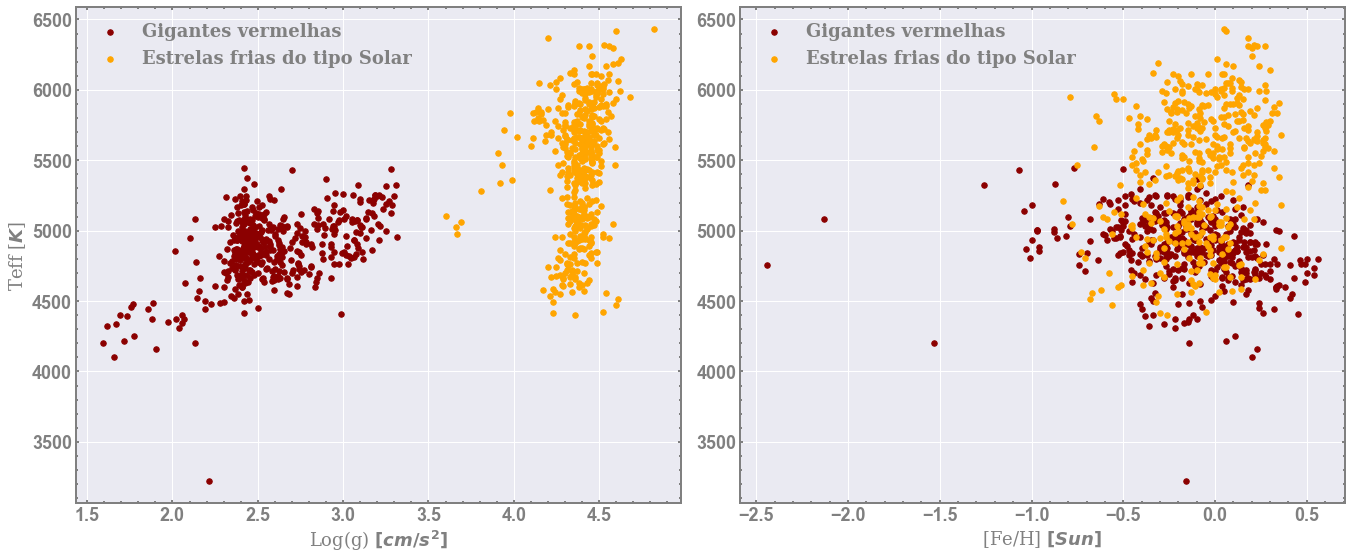

In [104]:
"""
Criação das 3º e 4º fontes
"""
Font3 = {"family":"serif", "weight":"normal", "color": "gray", "size": 18}
Font4 = FontProperties(family = "serif",
                      weight = "bold",
                      style = "normal",
                      size = 18)
fig, axs = plt.subplots(nrows = 1, # 1 linha
                        ncols = 2, # 2 colunas
                        figsize = (19, 8)) # tamanho da figura
axs[0].scatter(Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 0]["logg"], Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 0]["Teff"], s = 30, c = "darkred", label = "Gigantes vermelhas")
axs[0].scatter(Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 1]["logg"], Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 1]["Teff"], s = 30, c = "orange", label = "Estrelas frias do tipo Solar")
axs[1].scatter(Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 0]["[Fe/H]"], Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 0]["Teff"], s = 30, c = "darkred", label = "Gigantes vermelhas")
axs[1].scatter(Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 1]["[Fe/H]"], Concatenado_GV_SSOL[Concatenado_GV_SSOL["target"] == 1]["Teff"], s = 30, c = "orange", label = "Estrelas frias do tipo Solar")
axs[0].set_xlabel("Log(g) $[cm/s^{2}]$", fontdict = Font3)
axs[1].set_xlabel("[Fe/H] $[Sun]$", fontdict = Font3)
axs[0].set_ylabel("Teff [$K$]", fontdict = Font3)
for i in range(0, 2):
    for axis in ["left", "right", "top", "bottom"]:
        axs[i].spines[axis].set_linewidth(2)
        axs[i].spines[axis].set_color("gray")
    axs[i].xaxis.set_minor_locator(AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 18, top = True, right = True, left = True, bottom = True)
    axs[i].tick_params(which='minor', direction = "in", length=2, color='gray', width = 2, top = True, right = True, left = True, bottom = True)
    axs[i].tick_params(which='major', direction = "in", color='gray', length=3.4, width = 2, top = True, right = True, left = True, bottom = True)
fig.tight_layout()
axs[0].legend(frameon = False, prop = Font4, labelcolor = "gray")
axs[1].legend(frameon = False, prop = Font4, labelcolor = "gray")
plt.show()

# $\color{orange}{\textbf{Split dos dados}}$

In [105]:
"""
x: DF com apenas variáveis preditoras
"""
x = Concatenado_GV_SSOL.drop(["target"], axis = 1)
Norm = MinMaxScaler(feature_range = (0, 1))
"""
Normalizar x
"""
x_norm = Norm.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns = x.columns)
"""
y: Série com a variável target 
"""
y = Concatenado_GV_SSOL["target"]
"""
y_neural_network: y para a rede neural
"""
y_neural_network = to_categorical(y)
"""
Splits dos dados
"""
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm, y, test_size = 0.3, random_state = 101)
x_train_norm_neural_network, x_test_norm_neural_network, y_train_norm_neural_network, y_test_norm_neural_network = train_test_split(x_norm, y_neural_network, test_size = 0.3, random_state = 101)
x_train_neural_network, x_test_neural_network, y_train_neural_network, y_test_neural_network = train_test_split(x, y_neural_network, test_size = 0.3, random_state = 101)

# $\color{orange}{\textbf{Modelos de Machine Learning}}$

# $\color{orange}{\textbf{Regressão logística}}$

In [106]:
"""
Ajuste de hiperparâmetros para a regressão logística
"""
Logistic_regression = LogisticRegression()
penalty = ["l1", "l2", "elasticnet"]
C = np.array([0.0007, 0.001, 0.005, 0.009, 0.01])
param_grid = {"C": C, "penalty": penalty}
Grid_Logistic_regression = GridSearchCV(estimator = Logistic_regression, param_grid = param_grid, cv = 5, n_jobs=-1)
Grid_Logistic_regression.fit(x_train, y_train)
print(f"Penalty = {Grid_Logistic_regression.best_estimator_.penalty} // C = {Grid_Logistic_regression.best_estimator_.C}")

Penalty = l2 // C = 0.005


In [107]:
"""
Processo de treinamento
"""
Logistic_regression = LogisticRegression(penalty = "l2", C = 0.005)
Logistic_regression.fit(x_train, y_train)

LogisticRegression(C=0.005)

In [108]:
"""
Processo de predição
"""
y_pred_Logistic_regression = Logistic_regression.predict(x_test)
"""
Report geral
"""
print(classification_report(y_test, y_pred_Logistic_regression))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       127
           1       0.96      0.80      0.87       144

    accuracy                           0.87       271
   macro avg       0.88      0.88      0.87       271
weighted avg       0.89      0.87      0.87       271



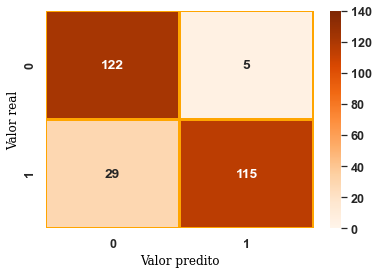

In [114]:
"""
Mapa de calor para a matriz de confusão
"""
font_heat_map = {"family": "serif", "weight": "normal", "size": 12, "color": "black"}
Matrix_Logistic_regression = confusion_matrix(y_test, y_pred_Logistic_regression)
sbn.heatmap(Matrix_Logistic_regression, 
            annot = True, 
            vmin = 0, 
            vmax = 140, 
            cmap = "Oranges", 
            fmt = "g", 
            linewidths=2, 
            linecolor="orange")
plt.ylabel("Valor real", fontdict = font_heat_map)
plt.xlabel("Valor predito", fontdict = font_heat_map)
plt.show()

In [115]:
"""
Predições de probabilidades para construção da curva roc
"""
y_pred_proba_Logistic_regression = Logistic_regression.predict_proba(x_test)
y_pred_proba_Logistic_regression = y_pred_proba_Logistic_regression[:, 1]
print(f"roc_auc_score_Logistic_regression = {roc_auc_score(y_test, y_pred_proba_Logistic_regression)}")

roc_auc_score_Logistic_regression = 0.934601924759405


# $\color{orange}{\textbf{KNN}}$

In [116]:
KNN = KNeighborsClassifier()
n_neighbors = np.array([20, 10, 9, 8, 7, 6, 5, 4, 3])
p = np.array([1, 2, 3, 4, 5, 6, 7])
metric = ["euclidean", "manhattan", "minkowski", "chebyshev"]
param_grid = {"n_neighbors": n_neighbors, "p": p, "metric": metric}
Grid_KNN = GridSearchCV(estimator = KNN, param_grid = param_grid, cv = 5, n_jobs=-1)
Grid_KNN.fit(x_train_norm, y_train_norm)
print(f"n neighbors = {Grid_KNN.best_estimator_.n_neighbors} // p = {Grid_KNN.best_estimator_.p} // metric = {Grid_KNN.best_estimator_.metric}")

n neighbors = 5 // p = 1 // metric = euclidean


In [117]:
KNN = KNeighborsClassifier(n_neighbors = 5, p = 1, metric = "euclidean")
KNN.fit(x_train_norm, y_train_norm)

KNeighborsClassifier(metric='euclidean', p=1)

In [118]:
y_pred_KNN = KNN.predict(x_test_norm)
print(accuracy_score(y_test_norm, y_pred_KNN))

1.0


In [119]:
print(classification_report(y_test_norm, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       144

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271



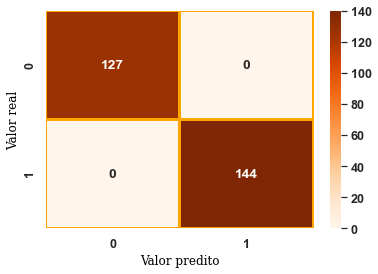

In [120]:
Matrix_KNN = confusion_matrix(y_test_norm, y_pred_KNN)
sbn.heatmap(Matrix_KNN, 
            annot = True, 
            vmin = 0, 
            vmax = 140, 
            cmap = "Oranges", 
            fmt = "g", 
            linewidths=2, 
            linecolor="orange")
plt.ylabel("Valor real", fontdict = font_heat_map)
plt.xlabel("Valor predito", fontdict = font_heat_map)
plt.show()

In [121]:
y_pred_proba_KNN = KNN.predict_proba(x_test_norm)
y_pred_proba_KNN = y_pred_proba_KNN[:, 1]
print(f"roc_auc_score_KNN = {roc_auc_score(y_test_norm, y_pred_proba_KNN)}")

roc_auc_score_KNN = 1.0


# $\color{orange}{\textbf{KMeans}}$

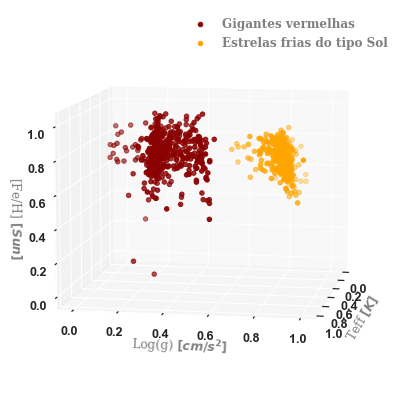

In [122]:
K = pd.concat([x_norm, y], axis = 1)
Font2 = FontProperties(family = "serif",
                      weight = "bold",
                      style = "normal",
                      size = 12)
fig = plt.figure(figsize = (7, 10))
ax = fig.add_subplot(projection = "3d")
ax.scatter(K[K["target"] == 0]["Teff"], 
           K[K["target"] == 0]["logg"],
           K[K["target"] == 0]["[Fe/H]"], c = "darkred", label = "Gigantes vermelhas")
ax.scatter(K[K["target"] == 1]["Teff"], 
           K[K["target"] == 1]["logg"],
           K[K["target"] == 1]["[Fe/H]"], c = "orange", label = "Estrelas frias do tipo Sol")
ax.view_init(9, 10)
ax.set_xlabel("Teff $[K]$", fontdict = Font1)
ax.set_ylabel("Log(g) $[cm/s^{2}]$", fontdict = Font1)
ax.set_zlabel("[Fe/H] $[Sun]$", fontdict = Font1)
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.legend(frameon = False, prop = Font2, labelcolor = "gray")
plt.show()

In [123]:
K_Means = KMeans(n_clusters=2, init = "k-means++", max_iter = 999, n_init = 10)
K_Means.fit(x_norm)

KMeans(max_iter=999, n_clusters=2)

In [125]:
y_predict_KMeans = K_Means.predict(x_norm)
y_predict_KMeans = pd.DataFrame(y_predict_KMeans)
y_predict_KMeans = y_predict_KMeans.replace({0:1, 1:0})
print(accuracy_score(y, y_predict_KMeans))

1.0


In [126]:
print(classification_report(y, y_predict_KMeans))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       451

    accuracy                           1.00       902
   macro avg       1.00      1.00      1.00       902
weighted avg       1.00      1.00      1.00       902



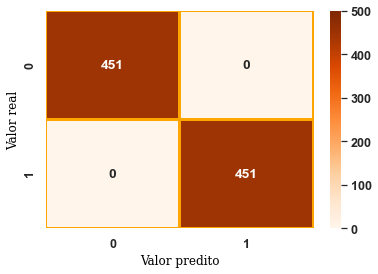

In [128]:
Matrix_KMeans = confusion_matrix(y, y_predict_KMeans)
sbn.heatmap(Matrix_KMeans, 
            annot = True, 
            vmin = 0, 
            vmax = 500, 
            cmap = "Oranges", 
            fmt = "g", 
            linewidths=2, 
            linecolor="orange")
plt.ylabel("Valor real", fontdict = font_heat_map)
plt.xlabel("Valor predito", fontdict = font_heat_map)
plt.show()

# $\color{orange}{\textbf{Naive Bayes}}$

In [129]:
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [130]:
y_pred_NB = NB.predict(x_test)
print(accuracy_score(y_test, y_pred_NB))

0.992619926199262


In [131]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       1.00      0.99      0.99       144

    accuracy                           0.99       271
   macro avg       0.99      0.99      0.99       271
weighted avg       0.99      0.99      0.99       271



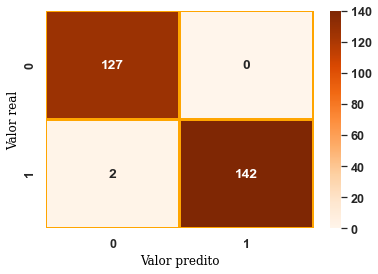

In [132]:
Matrix_NB = confusion_matrix(y_test, y_pred_NB)
sbn.heatmap(Matrix_NB, 
            annot = True, 
            vmin = 0, 
            vmax = 140, 
            cmap = "Oranges", 
            fmt = "g", 
            linewidths=2, 
            linecolor="orange")
plt.ylabel("Valor real", fontdict = font_heat_map)
plt.xlabel("Valor predito", fontdict = font_heat_map)
plt.show()

# $\color{orange}{\textbf{Random Forest}}$

In [133]:
%%time
Random_Forest = RandomForestClassifier()
max_depth = np.array([1, 2, 3, 4, 5, 6, 7])
min_samples_split = np.array([2, 3, 4, 5])
min_samples_leaf = np.array([2, 3, 4, 5])
param_grid = {"max_depth": max_depth, "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf}
Grid_Random_Forest = GridSearchCV(estimator = Random_Forest, param_grid = param_grid, cv = 5, n_jobs = -1)
Grid_Random_Forest.fit(x_train, y_train)
print(f"max_depth = {Grid_Random_Forest.best_estimator_.max_depth} // min_samples_split = {Grid_Random_Forest.best_estimator_.min_samples_split} // min_samples_leaf = {Grid_Random_Forest.best_estimator_.min_samples_leaf}")

max_depth = 2 // min_samples_split = 2 // min_samples_leaf = 2
Wall time: 26.1 s


In [134]:
Random_Forest = RandomForestClassifier(max_depth = 2, min_samples_split = 2, min_samples_leaf = 2)
Random_Forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=2)

In [135]:
y_pred_Random_Forest = Random_Forest.predict(x_test)
print(accuracy_score(y_test, y_pred_Random_Forest))

1.0


In [136]:
print(classification_report(y_test, y_pred_Random_Forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       144

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271



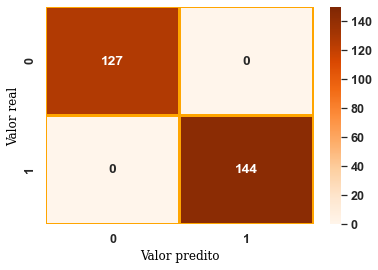

In [137]:
Matrix_Random_Forest = confusion_matrix(y_test, y_pred_Random_Forest)
sbn.heatmap(Matrix_Random_Forest, 
            annot = True, 
            vmax = 150, 
            vmin = 0, 
            fmt = "g", 
            cmap = "Oranges", 
            linewidths = 2, 
            linecolor = "orange")
plt.ylabel("Valor real", fontdict = font_heat_map)
plt.xlabel("Valor predito", fontdict = font_heat_map)
plt.show()

# $\color{orange}{\textbf{Extra Trees}}$

In [138]:
%%time
Extra_trees_classifier = ExtraTreesClassifier()
max_depth = np.array([1, 2, 3, 4, 5, 6])
min_samples_split = np.array([2, 3, 4, 5, 6, 7, 8, 9])
min_samples_leaf = np.array([2, 3, 4, 5])
param_grid = {"max_depth": max_depth, "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf}
Grid_Extra_trees_classifier = GridSearchCV(estimator = Extra_trees_classifier, param_grid = param_grid, cv = 5, n_jobs = -1)
Grid_Extra_trees_classifier.fit(x_train, y_train)
print(f"max_depth = {Grid_Extra_trees_classifier.best_estimator_.max_depth} // min_samples_split = {Grid_Extra_trees_classifier.best_estimator_.min_samples_split} // min_samples_leaf = {Grid_Extra_trees_classifier.best_estimator_.min_samples_leaf}")

max_depth = 2 // min_samples_split = 7 // min_samples_leaf = 2
Wall time: 32.5 s


In [139]:
Extra_trees_classifier = ExtraTreesClassifier(max_depth = 2, min_samples_split = 7, min_samples_leaf = 2)
Extra_trees_classifier.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=7)

In [140]:
y_pred_Extra_Trees = Extra_trees_classifier.predict(x_test)
print(accuracy_score(y_test, y_pred_Extra_Trees))

0.996309963099631


In [141]:
print(classification_report(y_test, y_pred_Extra_Trees))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       127
           1       1.00      0.99      1.00       144

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271



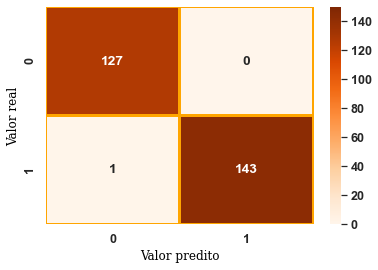

In [142]:
Matrix_Extra_trees_classifier = confusion_matrix(y_test, y_pred_Extra_Trees)
sbn.heatmap(Matrix_Extra_trees_classifier, 
            annot = True, 
            vmax = 150, 
            vmin = 0, 
            fmt = "g", 
            cmap = "Oranges", 
            linewidths = 2, 
            linecolor = "orange")
plt.ylabel("Valor real", fontdict = font_heat_map)
plt.xlabel("Valor predito", fontdict = font_heat_map)
plt.show()

# $\color{orange}{\textbf{AdaBoost}}$

In [143]:
Adaboost = AdaBoostClassifier(n_estimators=500)
learning_rate = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
param_grid = {"learning_rate": learning_rate}
Grid_Adaboost = GridSearchCV(estimator = Adaboost, param_grid = param_grid, cv = 5, n_jobs = -1)
Grid_Adaboost.fit(x_train, y_train)
print(f"learning_rate = {Grid_Adaboost.best_estimator_.learning_rate}")

learning_rate = 0.1


In [144]:
Adaboost = AdaBoostClassifier(n_estimators=500, learning_rate = 0.1)
Adaboost.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

In [145]:
y_pred_Adaboost = Adaboost.predict(x_test)
print(accuracy_score(y_test, y_pred_Adaboost))

1.0


In [146]:
print(classification_report(y_test, y_pred_Adaboost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       144

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271



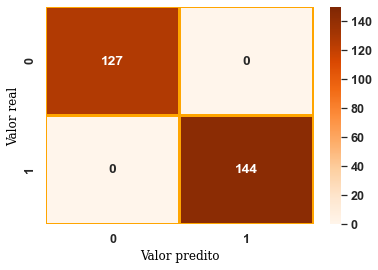

In [147]:
Matrix_Adaboost = confusion_matrix(y_test, y_pred_Adaboost)
sbn.heatmap(Matrix_Adaboost, 
            annot = True, 
            vmax = 150, 
            vmin = 0, 
            fmt = "g", 
            cmap = "Oranges", 
            linewidths = 2, 
            linecolor = "orange")
plt.ylabel("Valor real", fontdict = font_heat_map)
plt.xlabel("Valor predito", fontdict = font_heat_map)
plt.show()

# $\color{orange}{\textbf{Gradient boosting}}$

In [148]:
GradientBoosting = GradientBoostingClassifier(n_estimators=200)
learning_rate = np.array([0.1, 0.2, 0.3, 0.4])
min_samples_split = np.array([2, 3, 4, 5])
min_samples_leaf = np.array([2 , 3 ,4 ,5])
max_depth = np.array([2 , 3 ,4 ,5])
param_grid_GradientBoosting = {"learning_rate": learning_rate, "min_samples_split": min_samples_split, 
                              "min_samples_leaf": min_samples_leaf, "max_depth" : max_depth}
Grid_GradientBoosting = GridSearchCV(estimator = GradientBoosting, param_grid = param_grid_GradientBoosting, cv = 5, n_jobs=-1)
Grid_GradientBoosting.fit(x_train, y_train)
print(f"GradientBoosting: learning_rate  = {Grid_GradientBoosting.best_estimator_.learning_rate} // min_samples_split = {Grid_GradientBoosting.best_estimator_.min_samples_split} // min_samples_leaf = {Grid_GradientBoosting.best_estimator_.min_samples_leaf}")

GradientBoosting: learning_rate  = 0.1 // min_samples_split = 2 // min_samples_leaf = 2


In [149]:
GradientBoosting = GradientBoostingClassifier(n_estimators=200, learning_rate  = 0.1, min_samples_split = 2, min_samples_leaf = 2)
GradientBoosting.fit(x_train, y_train)

GradientBoostingClassifier(min_samples_leaf=2, n_estimators=200)

In [150]:
y_pred_GradientBoosting = GradientBoosting.predict(x_test)
print(accuracy_score(y_test, y_pred_GradientBoosting))

1.0


In [151]:
print(classification_report(y_test, y_pred_GradientBoosting))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       144

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271



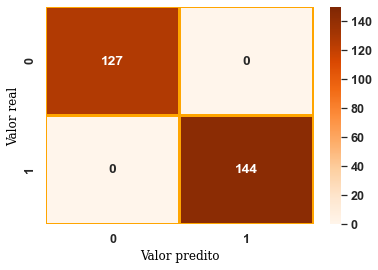

In [152]:
Matrix_GradientBoosting = confusion_matrix(y_test, y_pred_GradientBoosting)
sbn.heatmap(Matrix_GradientBoosting, 
            annot = True, 
            vmax = 150, 
            vmin = 0, 
            fmt = "g", 
            cmap = "Oranges", 
            linewidths = 2, 
            linecolor = "orange")
plt.ylabel("Valor real", fontdict = font_heat_map)
plt.xlabel("Valor predito", fontdict = font_heat_map)
plt.show()

# $\color{orange}{\textbf{SVM}}$

In [153]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
svc = SVC()
C = np.array([0.0001, 0.0006, 0.001, 0.005])
kernel = ["linear", "poly", "rbf", "sigmoid"]
degree = np.array([1, 2, 3, 4, 5, 6, 7, 8])
param_grid = {"C":C, "kernel": kernel, "degree": degree}
kfold = KFold(n_splits = 3, shuffle = True)
Grid_SVM = GridSearchCV(estimator = svc, param_grid = param_grid, cv = kfold, n_jobs=-1)
Grid_SVM.fit(x_train_norm, y_train_norm)
print(f"C = {Grid_SVM.best_estimator_.C} // kernel = {Grid_SVM.best_estimator_.kernel} // degree = {Grid_SVM.best_estimator_.degree}")

C = 0.005 // kernel = poly // degree = 1


In [154]:
svc = SVC(C = 0.005, kernel = "poly", degree = 1)
svc.fit(x_train_norm, y_train_norm)

SVC(C=0.005, degree=1, kernel='poly')

In [155]:
y_pred_SVC = svc.predict(x_test_norm)
print(accuracy_score(y_test_norm, y_pred_SVC))

1.0


In [156]:
print(classification_report(y_test_norm, y_pred_SVC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       144

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271



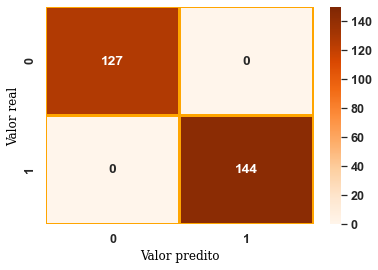

In [157]:
Matrix_svm = confusion_matrix(y_test_norm, y_pred_SVC)
sbn.heatmap(Matrix_svm, 
            annot = True, 
            vmax = 150, 
            vmin = 0, 
            fmt = "g", 
            cmap = "Oranges", 
            linewidths = 2, 
            linecolor = "orange")
plt.ylabel("Valor real", fontdict = font_heat_map)
plt.xlabel("Valor predito", fontdict = font_heat_map)
plt.show()

$\color{orange}{\textbf{Análise geral}}$

In [158]:
Lista_de_modelos = ["Regressão logística", "KNN", "KMeans", 
                   "Naive Bayes", "Random Forest", "Extra Trees",
                   "Adaboost", "Gradient Boosting", "SVM"]
Lista_de_acuracias = [accuracy_score(y_test, y_pred_Logistic_regression),
                     accuracy_score(y_test_norm, y_pred_KNN),
                     accuracy_score(y, y_predict_KMeans),
                     accuracy_score(y_test, y_pred_NB),
                     accuracy_score(y_test, y_pred_Random_Forest),
                     accuracy_score(y_test, y_pred_Extra_Trees),
                     accuracy_score(y_test, y_pred_Adaboost),
                     accuracy_score(y_test, y_pred_GradientBoosting),
                     accuracy_score(y_test_norm, y_pred_SVC)]
Lista_de_modelos = pd.DataFrame(Lista_de_modelos, columns = ["Modelos"])
Lista_de_acuracias = pd.DataFrame(Lista_de_acuracias, columns = ["acc"])
acc_model = pd.concat([Lista_de_modelos, Lista_de_acuracias], axis = 1)
acc_model

,Modelos,acc
0,Regressão logística,0.874539
1,KNN,1.000000
2,KMeans,1.000000
3,Naive Bayes,0.992620
4,Random Forest,1.000000
5,Extra Trees,0.996310
6,Adaboost,1.000000
7,Gradient Boosting,1.000000
8,SVM,1.000000


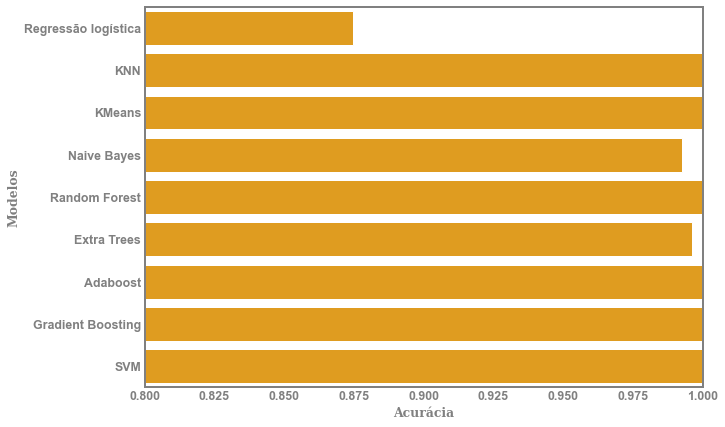

In [159]:
font5 = {"family": "serif", "weight": "bold", "color": "gray", "size": 12.4}
fig, ax = plt.subplots(figsize = (10, 7))
sbn.barplot(x = "acc", y = "Modelos", data = acc_model, color = "orange")
plt.xlabel("Acurácia",fontdict = font5)
plt.ylabel("Modelos", fontdict = font5)
for axis in ["left", "right", "top", "bottom"]:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color("gray")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 12.4)
ax.tick_params(which = "minor", direction = "in", width = 2, color = "gray", left = False)
ax.tick_params(which = "major", direction = "in", color = "gray", length=3.4, width = 2)
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.xlim(0.8, 1)
plt.show()

# $\color{orange}{\textbf{Redes neurais}}$

In [160]:
"""
Montagem da rede
"""
Modelo = Sequential()
Modelo.add(Dense(4, input_dim = 3, kernel_initializer = "normal", activation = "relu"))
Modelo.add(Dense(2, kernel_initializer = "normal", activation = "softmax"))

In [161]:
from keras.optimizers import Adam
optimizer = Adam() # Optimizador Adam()
Modelo.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ["acc"])
History = Modelo.fit(x_train_norm_neural_network, y_train_norm_neural_network, epochs = 500, batch_size = 200, validation_data=(x_test_norm_neural_network, y_test_norm_neural_network), verbose = 0)

In [162]:
acc_test = History.history["val_acc"]
max(acc_test)

0.9963099360466003

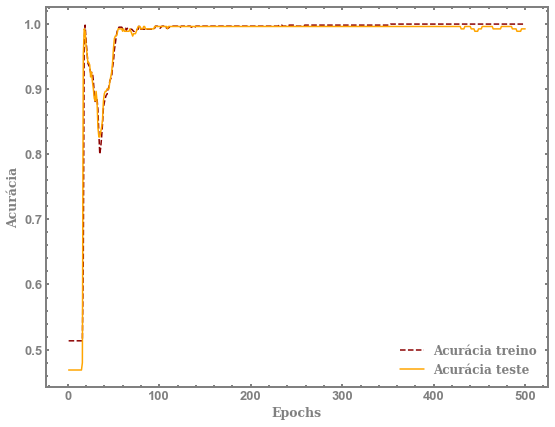

In [163]:
"""
Gráfico de comparação entre acurácia de treino e teste
"""
acc_train = History.history["acc"]
epochs = range(1, len(acc_train) + 1)
fig, ax = plt.subplots(figsize = (9, 7))
ax.plot(epochs, acc_train, "--g", color = "darkred", label = "Acurácia treino")
ax.plot(epochs, acc_test, "-b", color = "orange", label = "Acurácia teste")
for axis in ["left", "right", "top", "bottom"]:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color("gray")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 13, top = True, right = True, left = True, bottom = True)
ax.tick_params(which='minor', direction = "in", length=2, color='gray', width = 2, top = True, right = True, left = True, bottom = True)
ax.tick_params(which='major', direction = "in", color='gray', length=3.4, width = 2, top = True, right = True, left = True, bottom = True)
ax.legend(frameon = False, prop = Font2, labelcolor = "gray")
ax.set_xlabel("Epochs", fontdict = font5)
ax.set_ylabel("Acurácia", fontdict = font5)
fig.patch.set_facecolor("white")
Cor_fundo = plt.gca()
Cor_fundo.set_facecolor("white")
Cor_fundo.patch.set_alpha(1)
plt.show()